In [51]:
import spotscope as ss
from PIL import Image
import numpy as np

# 调整 Pillow 的安全限制
Image.MAX_IMAGE_PIXELS = None
# Load the image
image_path = "example_data/MOB_celltype/standard_MOB.jpg"


# Better load reference dataset if available.
# Or you can comment it for lower computation cost.

key_dataset_paths = [
    "example_data/MOB_celltype/mouse_bolb_1.h5ad",
    "example_data/MOB_celltype/mouse_bolb_2.h5ad",
    "example_data/MOB_celltype/mouse_bolb_3.h5ad",
    "example_data/MOB_celltype/mouse_bolb_4.h5ad",
    "example_data/MOB_celltype/mouse_bolb_5.h5ad",
    "example_data/MOB_celltype/mouse_bolb_6.h5ad",
    "example_data/MOB_celltype/mouse_bolb_7.h5ad",
    "example_data/MOB_celltype/mouse_bolb_8.h5ad",
]

grid_size = 228  # control the inference resolution, smaller is more dense!
density_threshold = 0.99
adata_st = ss.infer_from_image(
    image_path,
    key_adata_paths= key_dataset_paths, # comment this if no reference data
    model_path="ckpt/mob_celltype.pt",
    model=ss.CLIPModel(0.01, 1024, 4, 128),
    grid_size=grid_size,
    density_threshold=density_threshold,
    topk=50,
    lower_perc=0.5,
    mode="advanced",
    annotation_type="continuous",
    annotation_list=np.array(['GC', 'M/TC', 'PGC', 'OSNs'], dtype=object)

)

Detecting coordinates in tissue...
Building key loaders
Finished building key loaders


/nas/ljc/Spotscope/spotscope/utils.py:115: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(model_path)


Finished loading model
Building query loaders
Finished building query loaders
Getting image embeddings...


100%|██████████| 18/18 [00:01<00:00, 13.33it/s]


Getting spot embeddings...


100%|██████████| 64/64 [00:01<00:00, 48.86it/s]


Getting key annotations...


100%|██████████| 64/64 [00:01<00:00, 47.83it/s]


Getting query coordinates...


100%|██████████| 18/18 [00:00<00:00, 26.69it/s]


Querying...


In [52]:
adata_st

AnnData object with n_obs × n_vars = 545 × 2
    uns: 'spatial', 'key_dataloaders', 'key_dataset', 'key_data_size', 'annotation_list', 'query_dataloaders', 'query_dataset', 'query_data_size', 'query_img_embeddings', 'key_spot_embeddings', 'key_annotations', 'spot_coordinates'
    obsm: 'spatial', 'inferred_spot_embeddings', 'inferred_spot_annotations'

In [53]:
celltypes = adata_st.uns['annotation_list']

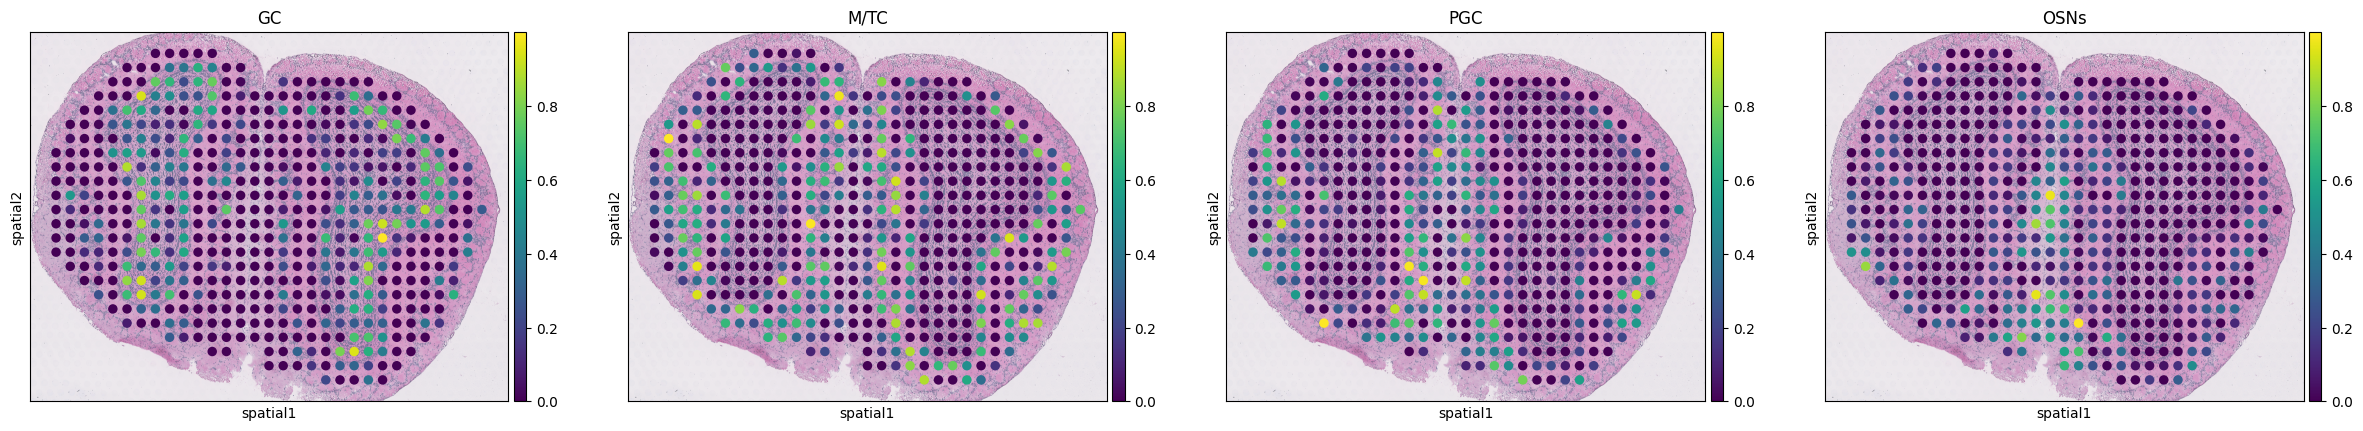

In [54]:
ss.plot_annotations(adata_st, annotation_key='inferred_spot_annotations')

In [55]:
import numpy as np
adata_st.uns['annotation_list'] = np.array(adata_st.uns['annotation_list'])

In [56]:
adata_st.obs['major_celltype'] = adata_st.uns['annotation_list'][adata_st.obsm['inferred_spot_annotations'].argmax(1)]

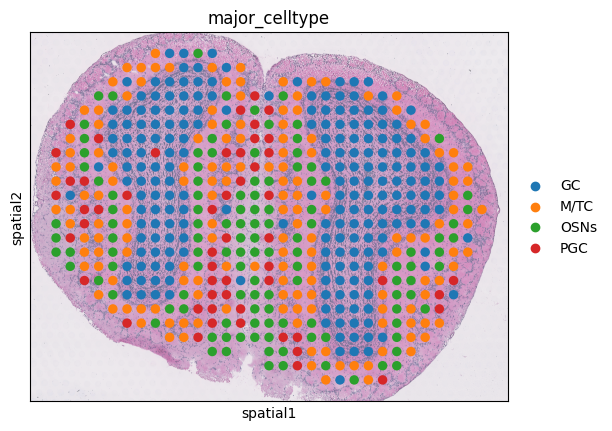

In [57]:
import scanpy as sc
sc.pl.spatial(adata_st, color="major_celltype", alpha_img=0.7)